In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
df_test = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/Data Science II/Assignment 1/test.csv', ";")
df_train = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/Data Science II/Assignment 1/train.csv', ";")

/var/folders/4r/t2pxznrn4dz28d6ymprq1p9c0000gn/T/ipykernel_86203/2530379859.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_test = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/Data Science II/Assignment 1/test.csv', ";")
/var/folders/4r/t2pxznrn4dz28d6ymprq1p9c0000gn/T/ipykernel_86203/2530379859.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_train = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/Data Science II/Assignment 1/train.csv', ";")


In [ ]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df_train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df_test.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df_train.drop_duplicates(inplace= True)
df_test.drop_duplicates(inplace= True)

In [ ]:
df_train['y'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
print(df_test['y'].value_counts())
print(df_train['y'].value_counts())

no     4000
yes     521
Name: y, dtype: int64
no     39922
yes     5289
Name: y, dtype: int64


In [ ]:
df_test['y'] = df_test['y'].map({'yes': 1, 'no': 0})
df_train['y'] = df_train['y'].map({'yes': 1, 'no': 0})

In [ ]:
unknown_counts_train = (df_train == 'unknown').sum()
columns_with_unknown_train = unknown_counts_train[unknown_counts_train > 0]
proportion_with_unknown_train = unknown_counts_train[unknown_counts_train > 0] / len(df_train)
print(columns_with_unknown_train,  proportion_with_unknown_train*100)

job            288
education     1857
contact      13020
poutcome     36959
dtype: int64 job           0.637013
education     4.107407
contact      28.798301
poutcome     81.747805
dtype: float64


In [ ]:
unknown_counts_test = (df_test == 'unknown').sum()
columns_with_unknown_test = unknown_counts_test[unknown_counts_test > 0]
proportion_with_unknown_test = unknown_counts_test[unknown_counts_test > 0] / len(df_test)
print(columns_with_unknown_test,  proportion_with_unknown_test*100)

job            38
education     187
contact      1324
poutcome     3705
dtype: int64 job           0.840522
education     4.136253
contact      29.285556
poutcome     81.950896
dtype: float64


There are values 'unknown'. in columns job and education, however the amount is small enough where I feel I could simply impute the data with the mode values of the column. For contact and poutcome, the proportion of 'unknown' is much higher and a different approach may be needed.

In [ ]:
df_train['job'].replace('unknown', df_train['job'].mode()[0], inplace=True)
df_train['education'].replace('unknown', df_train['education'].mode()[0], inplace=True)
df_test['job'].replace('unknown', df_test['job'].mode()[0], inplace=True)
df_test['education'].replace('unknown', df_test['education'].mode()[0], inplace=True)

For the contact column, I'm going to look to impute the unknown values using a classification model to predict what the values should be. I'm doing this because there's 30% of the values that are 'unknown' and imputing with mode would likely cause too much bias, so I'm taking this approach instead.

In [ ]:
contact_train = df_train[df_train['contact'] != 'unknown'] # setting the training data to be the rows that do not have unknown in the contact column
contact_train = contact_train.drop('y', axis=1) #removing y from the data as this would not be available for imputation predictions
contact_predict = df_train[df_train['contact'] == 'unknown'] #setting the predict data to include the rows with unknown in the contact column
contact_predict = contact_predict.drop('y', axis=1) # removing y column once again.

I'm going to now build the model, splitting the contact train data to be train and validation, and setting the contact column as the target.

In [ ]:
X = contact_train.drop(['contact'], axis=1)
y= contact_train['contact']

X_train_actual, X_valid, y_train_actual, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train_actual)

X_valid_encoded = encoder.transform(X_valid)
X_predict_encoded = encoder.transform(contact_predict.drop('contact', axis=1))

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_encoded, y_train_actual)

y_valid_pred = dt.predict(X_valid_encoded)

accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Accuracy of imputation on the validation set: {accuracy:.2f}")

predicted_values = dt.predict(X_predict_encoded)

df_train.loc[df_train['contact'] == 'unknown', 'contact'] = predicted_values

Accuracy of imputation on the validation set: 0.88


In [ ]:
contact_train_2 = df_test[df_test['contact'] != 'unknown']
contact_predict_2 = df_test[df_test['contact'] == 'unknown']

X_train_actual_2, X_valid_2, y_train_actual_2, y_valid_2 = train_test_split(
    contact_train_2.drop('contact', axis=1),
    contact_train_2['contact'],
    test_size=0.3,
    random_state=42
)

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded_2 = encoder.fit_transform(X_train_actual_2)

X_valid_encoded_2 = encoder.transform(X_valid_2)
X_predict_encoded_2 = encoder.transform(contact_predict_2.drop('contact', axis=1))

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_encoded_2, y_train_actual_2)

y_valid_pred_2 = dt.predict(X_valid_encoded_2)

accuracy = accuracy_score(y_valid_2, y_valid_pred_2)
print(f"Accuracy of imputation on the validation set: {accuracy:.2f}")

predicted_values_2 = dt.predict(X_predict_encoded_2)

df_test.loc[df_test['contact'] == 'unknown', 'contact'] = predicted_values_2

Accuracy of imputation on the validation set: 0.87


In [ ]:
print('df_train contact value counts after imputation:\n', df_train['contact'].value_counts())
print('df_train contact value counts after imputation:\n', df_test['contact'].value_counts())

df_train contact value counts after imputation:
 cellular     41515
telephone     3696
Name: contact, dtype: int64
df_train contact value counts after imputation:
 cellular     4142
telephone     379
Name: contact, dtype: int64


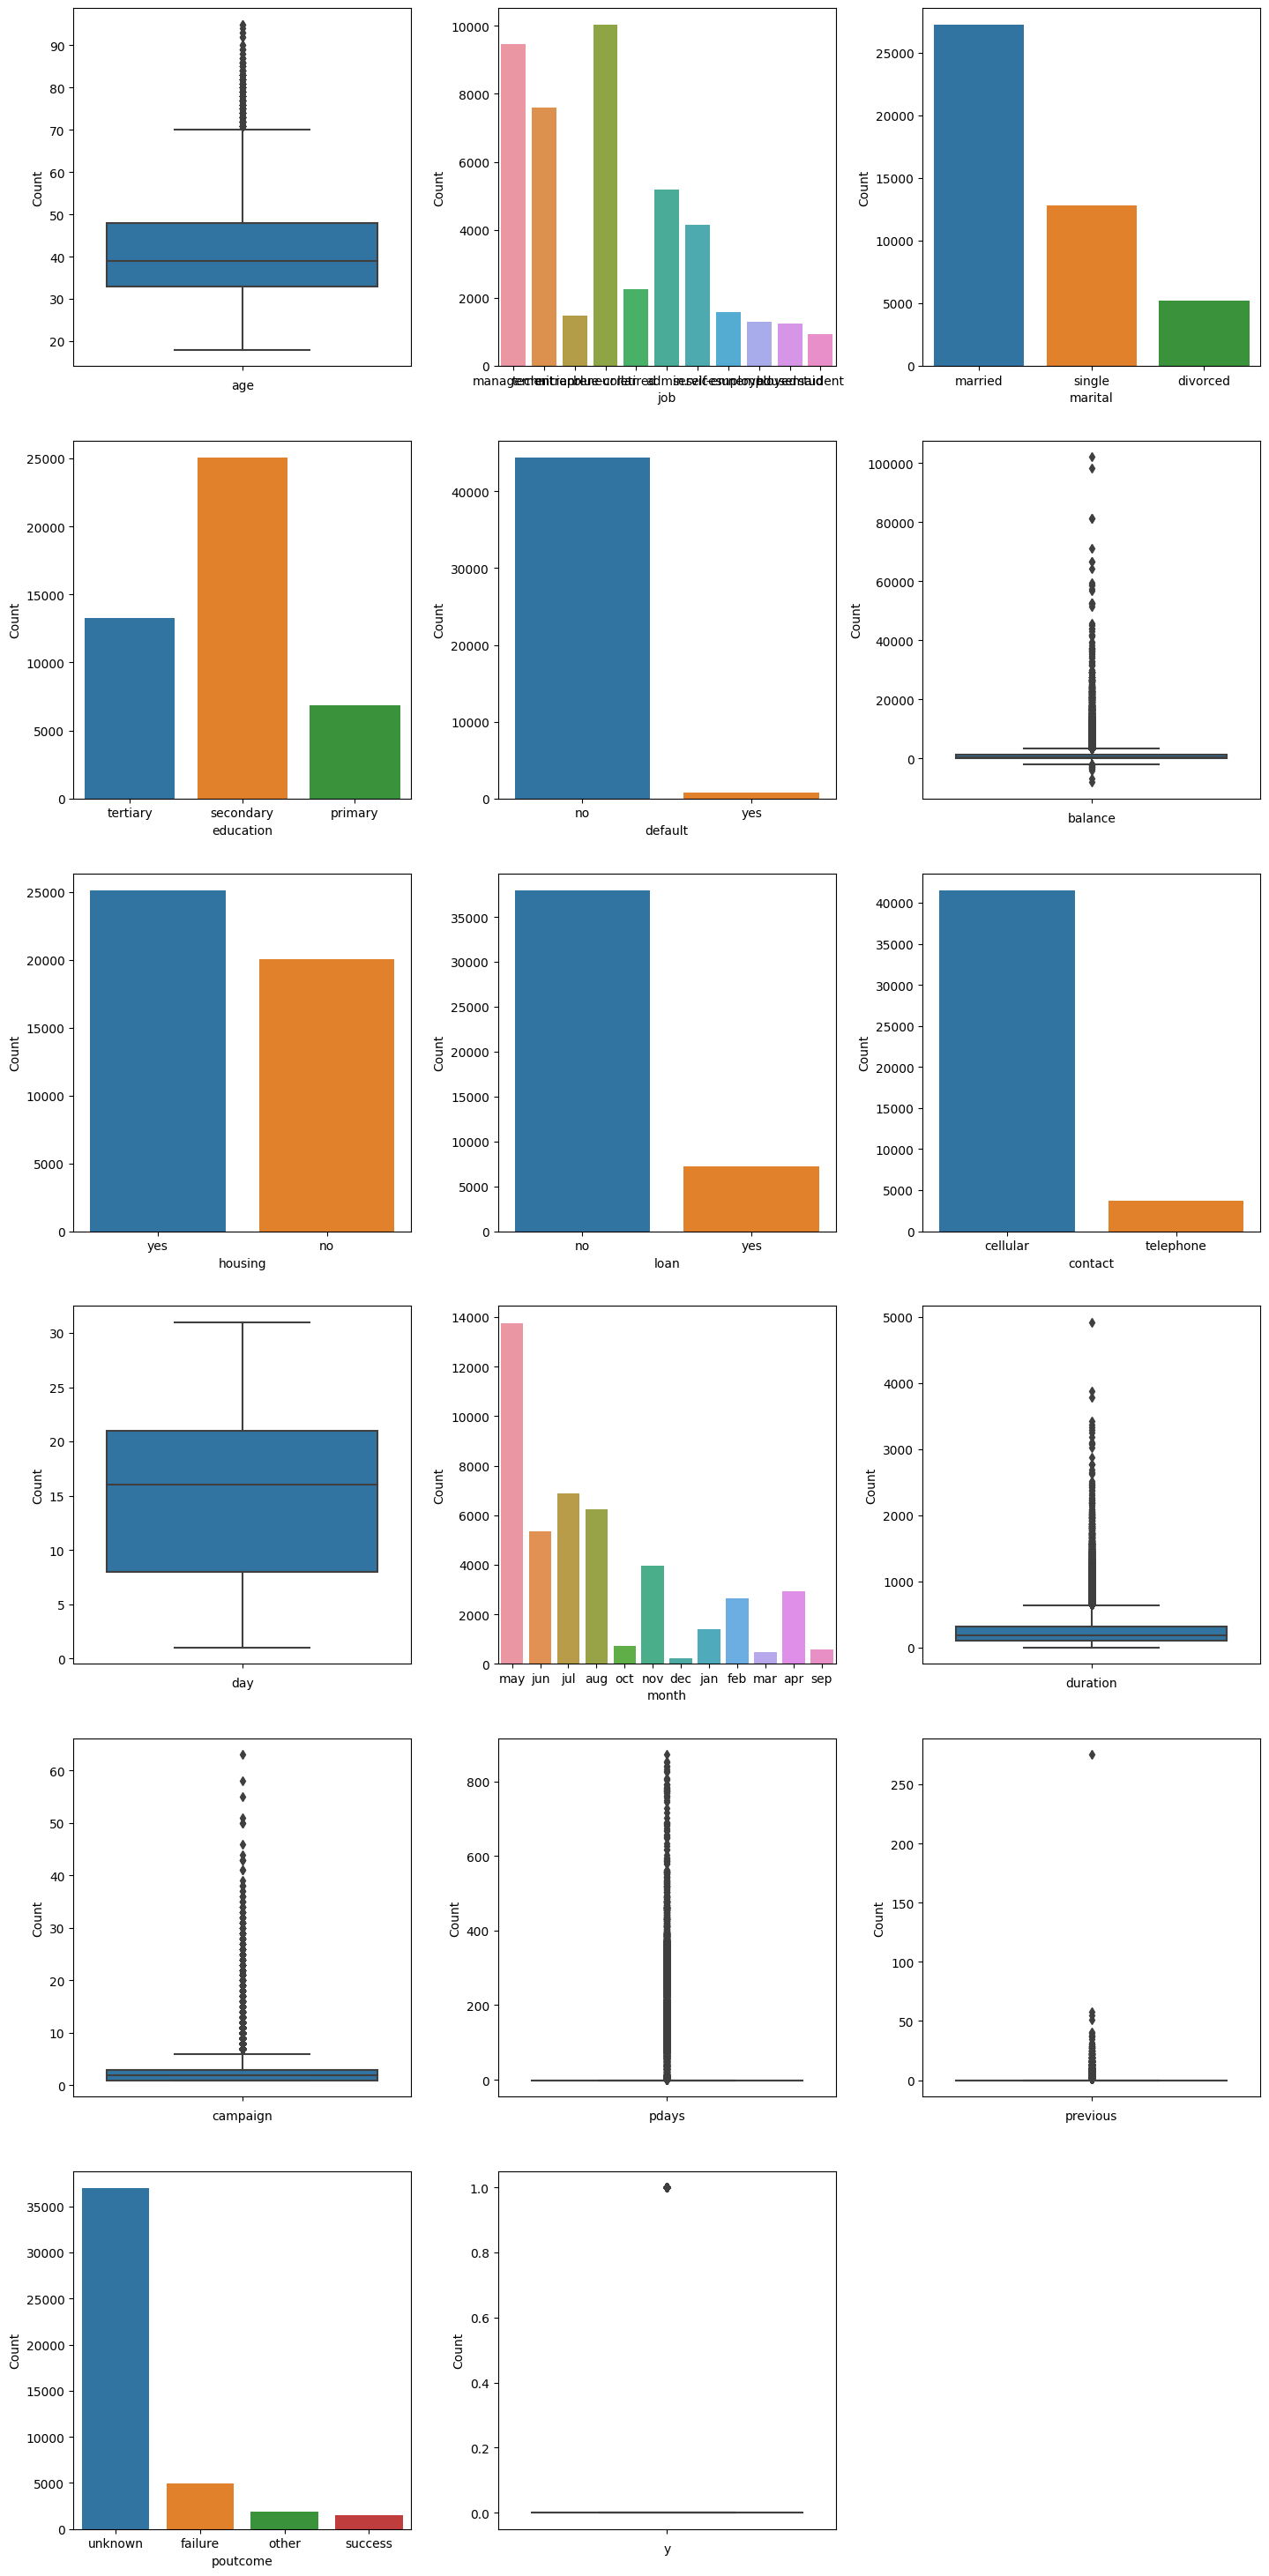

In [ ]:
columns = df_train.columns
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=4.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]

    if np.issubdtype(df_train[column].dtype, np.number):
        sns.boxplot(data=df_train, y=column, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
    else:
        sns.countplot(data=df_train, x=column, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

for j in range(i+1, num_rows*num_cols):
    axes.flatten()[j].set_visible(False)



plt.show()

For most numerical data, there are many values considered outliers. However, since this is a classification problem, we have models available that are able to handle outliers quite well. The only outlier I think I will remove is the previous column value above 250, as it is one outlier value that is extremely far from the mean of the data.

In [ ]:
df_train[df_train['previous']> 250]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,0


In [ ]:
df_train = df_train[df_train['previous'] <= 250]

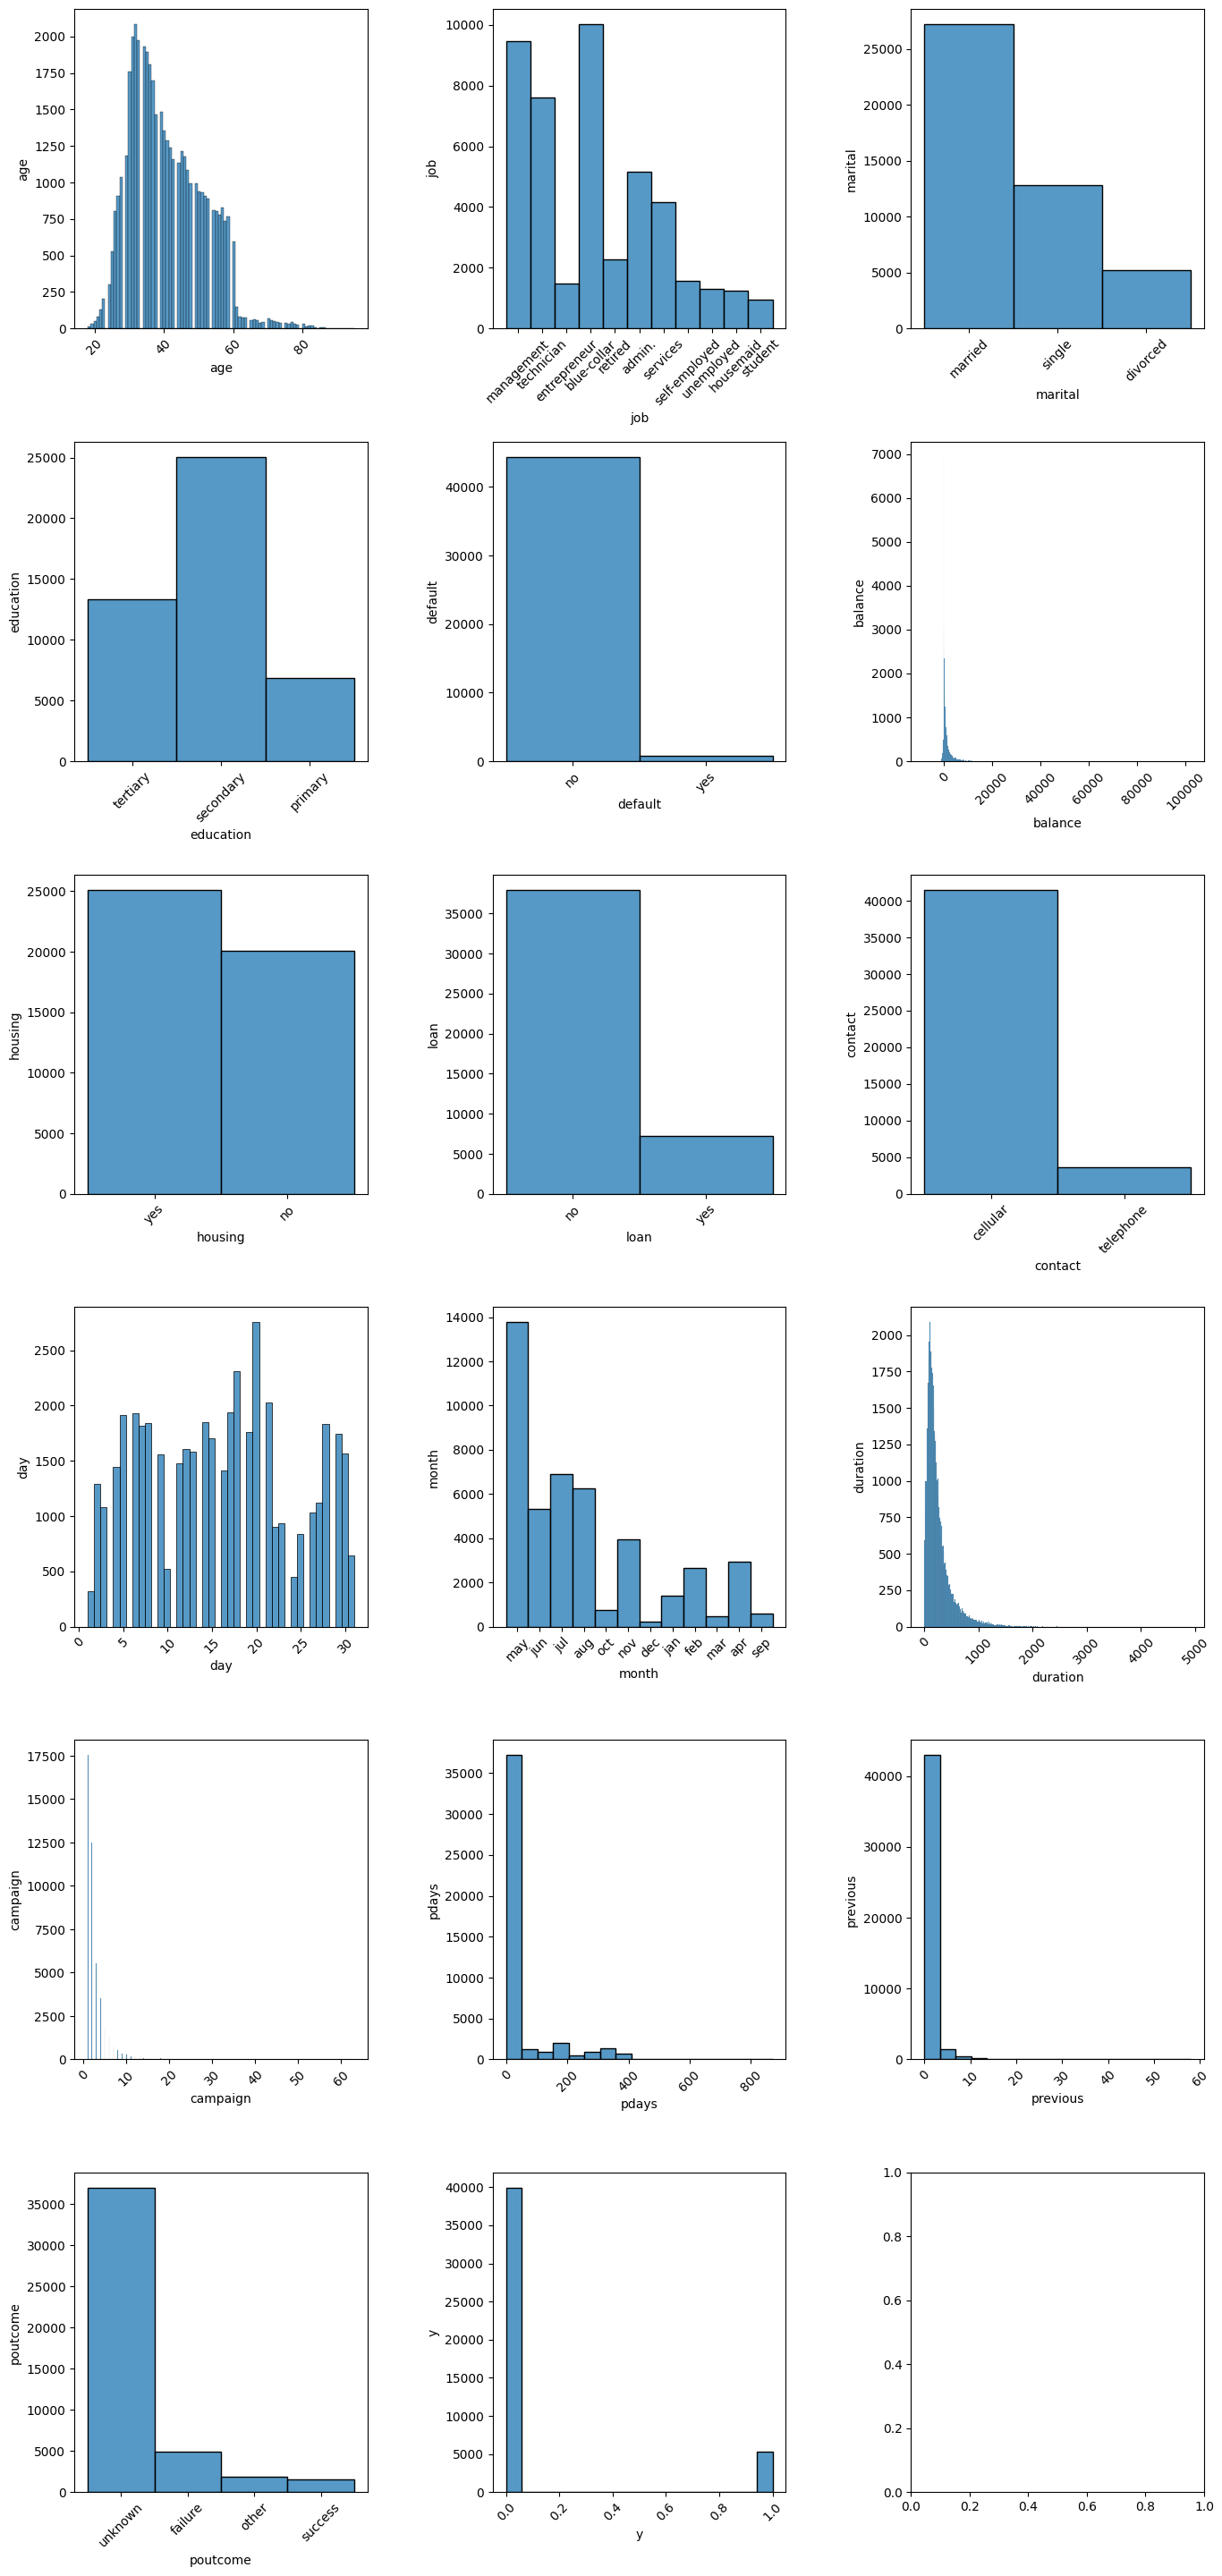

In [ ]:
columns = df_train.columns
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=7.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=df_train, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)
    ax.tick_params(axis='x', rotation=45)
plt.show()

I'm going to leave the remainder of the outliers. There are so many in this dataset that removing all outliers would remove far to much of the data, so we should look to use models that will handle outliers well. We can see though that in both the test and train datasets, there's lots of inbalance in the y target variable. This may cause problems for baseline models. I'll keep this in mind, as synthetic sampling may be needed.

I will do some bivariant analysis to see the relationships between the features and the target variable

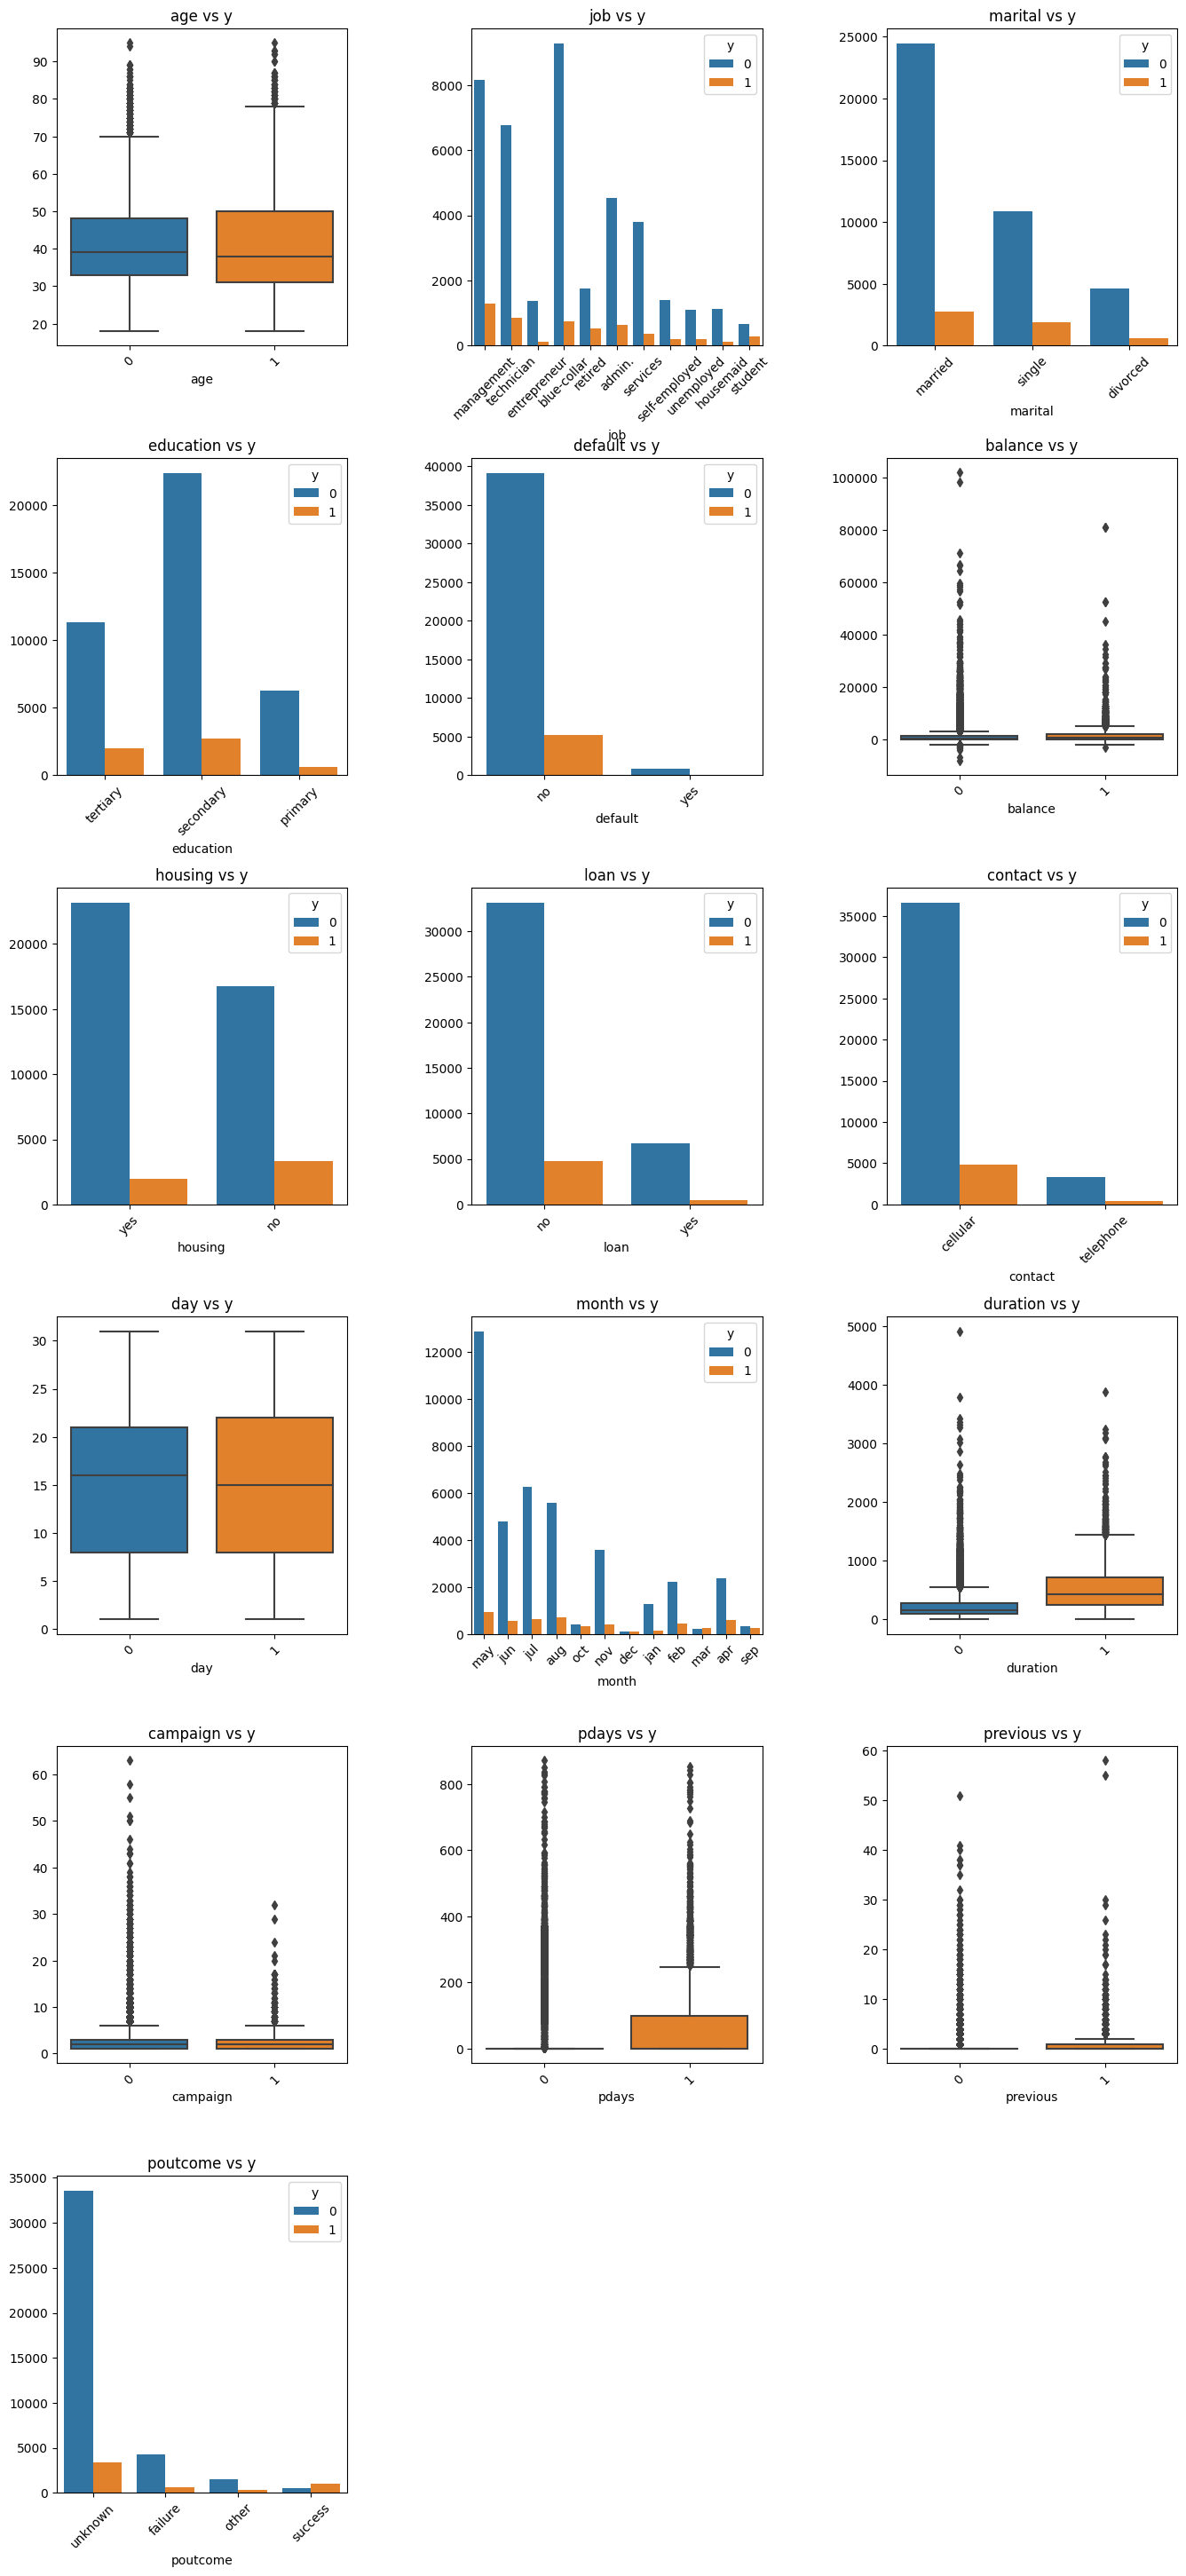

In [ ]:
columns = df_train.columns.drop('y')
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad= 7.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    
    if np.issubdtype(df_train[column].dtype, np.number):
        sns.boxplot(data=df_train, y=column, x='y', ax=ax)
    else:
        sns.countplot(data=df_train, x=column, hue='y', ax=ax)
    
    ax.set_xlabel(column)
    ax.set_ylabel('')
    ax.set_title(f"{column} vs y")
    ax.tick_params(axis='x', rotation=45)

for j in range(i+1, num_rows*num_cols):
    axes.flatten()[j].set_visible(False)

plt.show()

There's a few takeaways that we can see in these graphs: 
1. People who have subscribed seem to skew a little older 
2. Job seems to matter (with retired people seeming to subscribe at a higher relative rate) 
3. Marital status and education seem to have an effect (proportional analysis could help clarify this further) 
4. People who have defaulted never subscribe 
5. People who subscribe seem to have higher balances (on average) 
6. Those without housing or personal loans subscribe at a higher percentage rate than those with loans 
7. Those with the preferred contact method of cellphone vs telephone seem to subscribe at a hgiher rate
8. Time of year (month) definitely seems to make a huge impact 
9. Those who had longer contact times during the last call on average tended to subscribe more often. 
10. The number of contacts performed during the campaign seems to be significant as well, with customers contacted over roughly 35 times never subscribing. 

I will look into these further to see if any new features can be created to help the models.

In [ ]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'campaign','poutcome']
num_columns = ['balance', 'pdays', 'previous']
target = 'y'

In [ ]:
num_grouped = df_train[num_columns].groupby(df_train['y']).mean()

def mode_agg(x):
    return x.mode().iloc[0]

cat_grouped = df_train[cat_columns].groupby(df_train['y']).agg(mode_agg)
df_train_grouped = pd.concat([num_grouped, cat_grouped], axis=1)

In [ ]:
df_train_grouped.head()

,balance,pdays,previous,job,marital,education,default,housing,loan,contact,day,month,campaign,poutcome
y,,,,,,,,,,,,,,
0,1303.734025,36.415721,0.495278,blue-collar,married,secondary,no,yes,no,cellular,20,may,1,unknown
1,1804.267915,68.702968,1.170354,management,married,secondary,no,no,no,cellular,30,may,1,unknown


I'm going to do some feature engineering. I want to create new features with loan information, as well as create a binary contacted or not contacted column based on pdays.

In [ ]:
#create binary contacted column
df_train.insert(14, 'contacted', np.where(df_train['pdays'] == -1, 0, 1))
df_test.insert(14, 'contacted', np.where(df_test['pdays'] == -1, 0, 1))

I'm going to make some additional features using loan information as it was a big factor in success. I'll first rename the current columns so they're better descriptions of what the columns are, and then I will make two binary columns for any loans and both loans to see if that information helps the models.

In [ ]:
df_train.rename(columns={'loan': 'personal_loan'}, inplace=True)
df_test.rename(columns={'loan': 'personal_loan'}, inplace=True)
df_train.rename(columns={'housing': 'housing_loan'}, inplace=True)
df_test.rename(columns={'housing': 'housing_loan'}, inplace=True)

In [ ]:
df_train.insert(8, 'any_loans', np.where((df_train['housing_loan'] == 'yes') | (df_train['personal_loan'] == 'yes'), 1, 0))
df_test.insert(8, 'any_loans', np.where((df_test['housing_loan'] == 'yes') | (df_test['personal_loan'] == 'yes'), 1, 0))

In [ ]:
df_train.insert(9, 'both_loans', np.where((df_train['housing_loan'] == 'yes') & (df_train['personal_loan'] == 'yes'), 1, 0))
df_test.insert(9, 'both_loans', np.where((df_test['housing_loan'] == 'yes') & (df_test['personal_loan'] == 'yes'), 1, 0))

In [ ]:
df_train

,age,job,marital,education,default,balance,housing_loan,personal_loan,any_loans,both_loans,contact,day,month,duration,campaign,pdays,contacted,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,1,0,cellular,5,may,261,1,-1,0,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,1,0,cellular,5,may,151,1,-1,0,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,1,cellular,5,may,76,1,-1,0,0,unknown,0
3,47,blue-collar,married,secondary,no,1506,yes,no,1,0,cellular,5,may,92,1,-1,0,0,unknown,0
4,33,blue-collar,single,secondary,no,1,no,no,0,0,cellular,5,may,198,1,-1,0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,0,0,cellular,17,nov,977,3,-1,0,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,0,0,cellular,17,nov,456,2,-1,0,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,0,0,cellular,17,nov,1127,5,184,1,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,0,0,telephone,17,nov,508,4,-1,0,0,unknown,0


In [ ]:
df_train.head()

,age,job,marital,education,default,balance,housing_loan,personal_loan,any_loans,both_loans,contact,day,month,duration,campaign,pdays,contacted,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,1,0,cellular,5,may,261,1,-1,0,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,1,0,cellular,5,may,151,1,-1,0,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,1,cellular,5,may,76,1,-1,0,0,unknown,0
3,47,blue-collar,married,secondary,no,1506,yes,no,1,0,cellular,5,may,92,1,-1,0,0,unknown,0
4,33,blue-collar,single,secondary,no,1,no,no,0,0,cellular,5,may,198,1,-1,0,0,unknown,0


<Axes: xlabel='personal_loan', ylabel='count'>

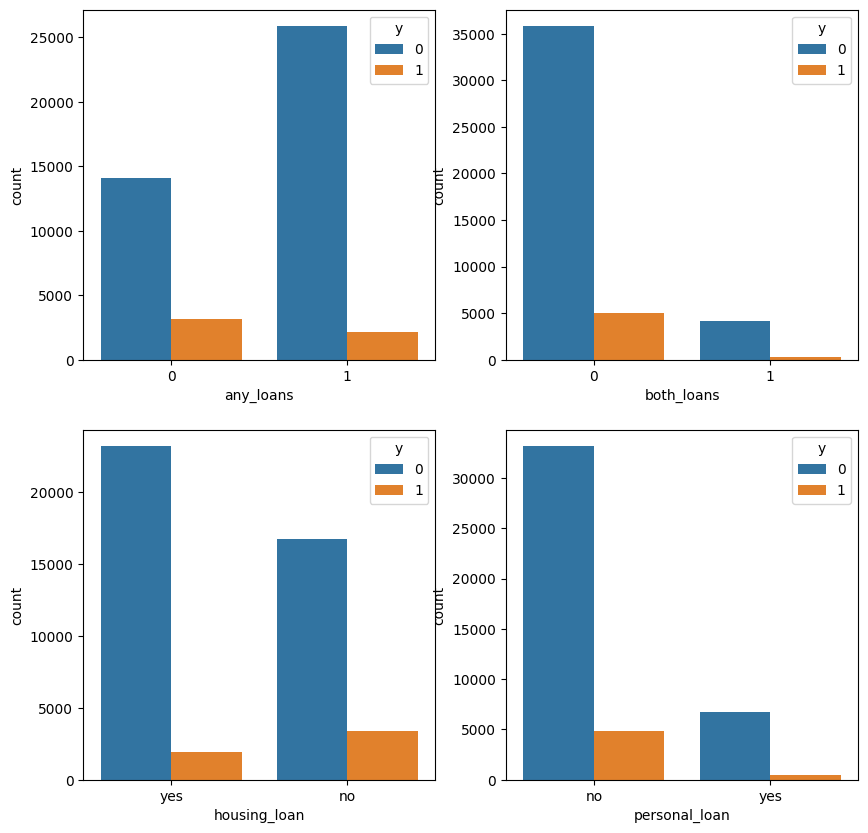

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot(data=df_train, x='any_loans', hue='y', ax=ax1)
sns.countplot(data=df_train, x='both_loans', hue='y', ax=ax2)
sns.countplot(data=df_train, x='housing_loan', hue='y', ax=ax3)
sns.countplot(data=df_train, x='personal_loan', hue='y', ax=ax4)

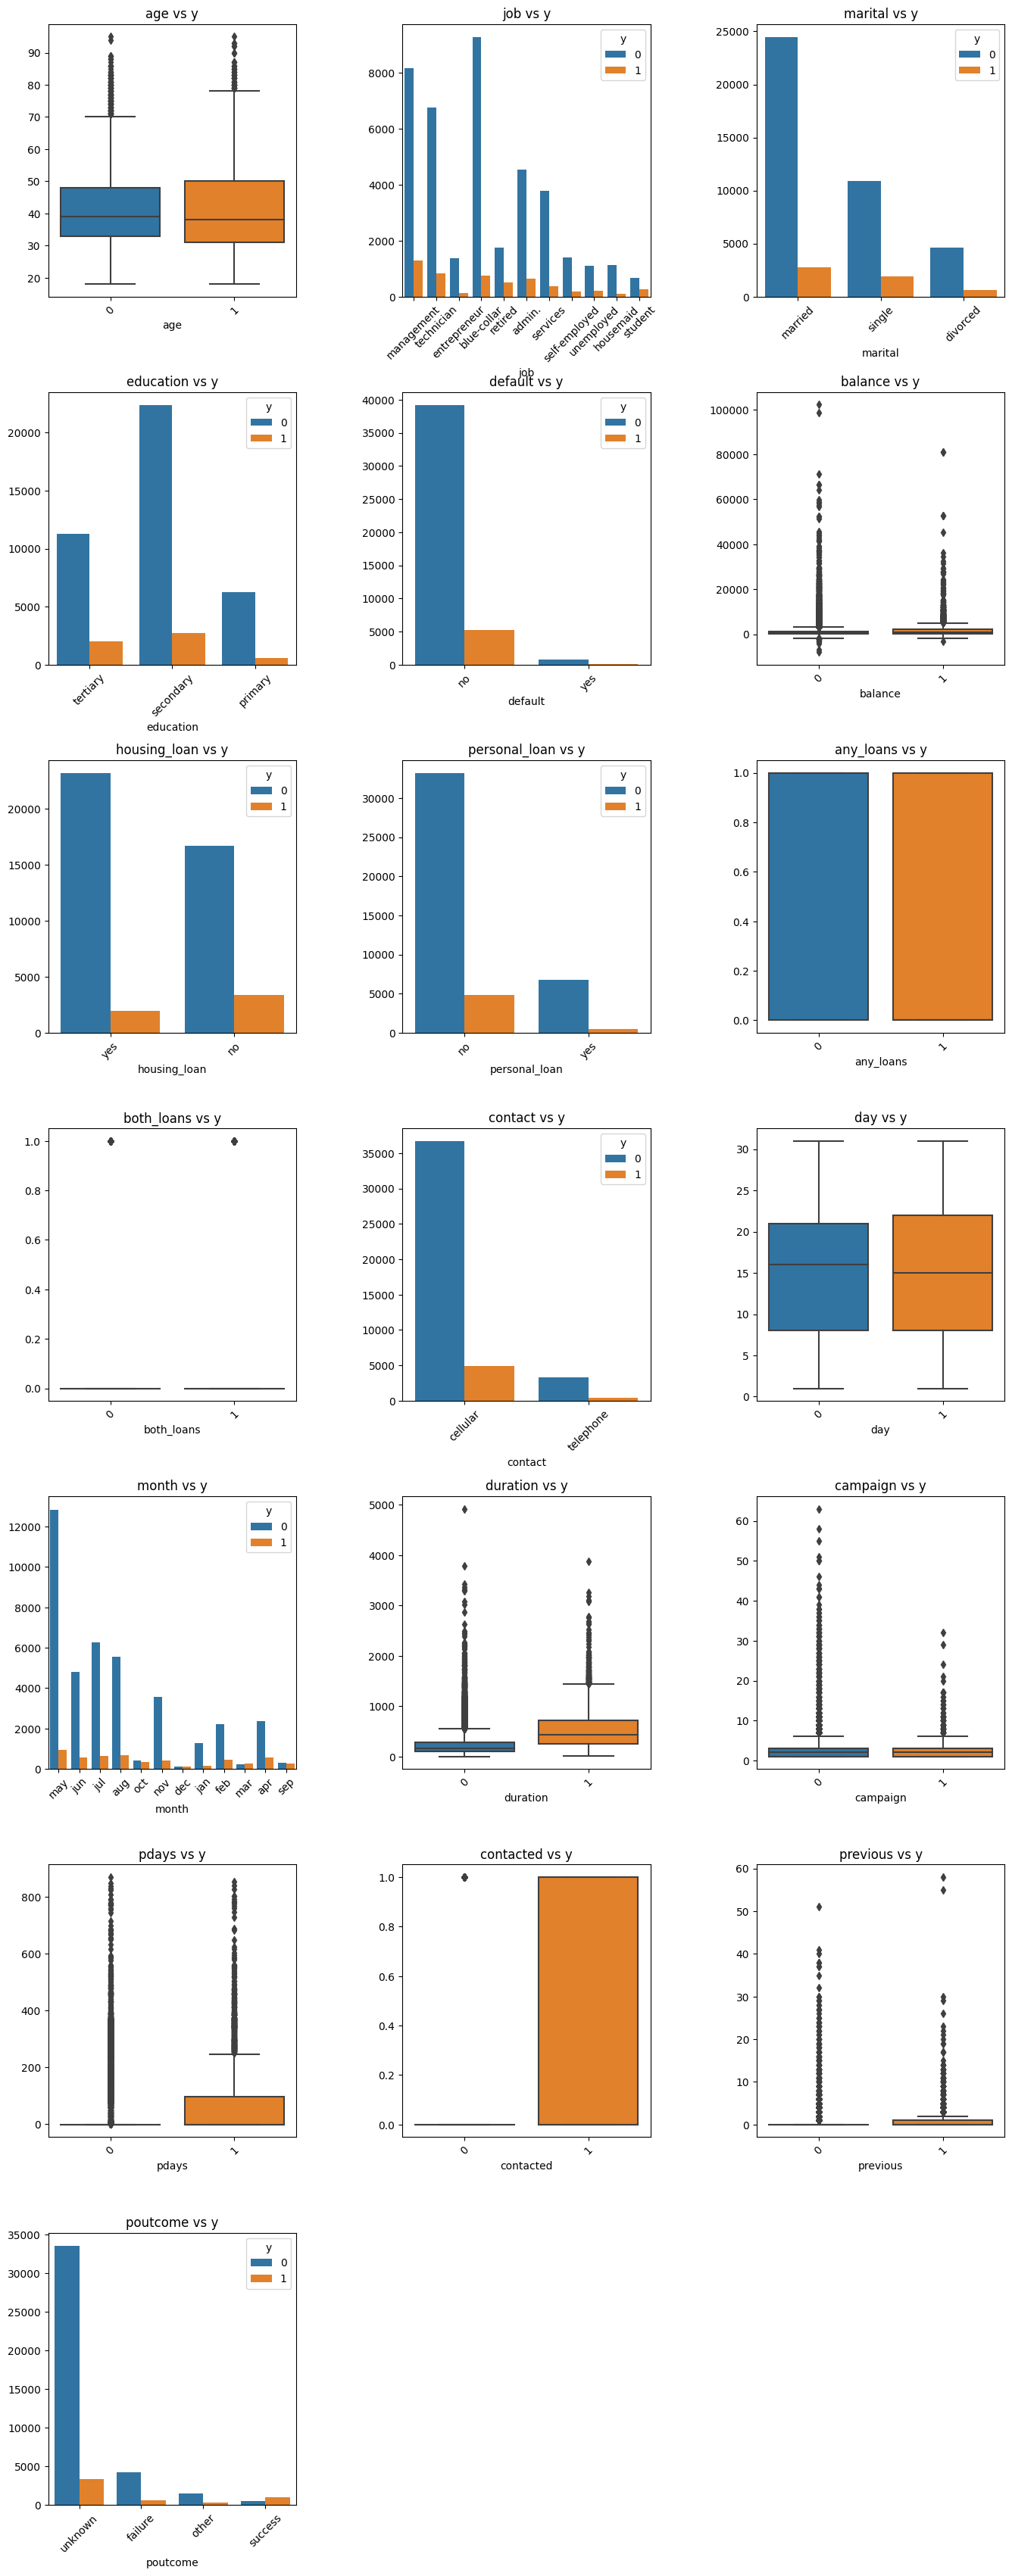

In [ ]:
columns = df_train.columns.drop('y')
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad= 7.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    
    if np.issubdtype(df_train[column].dtype, np.number):
        sns.boxplot(data=df_train, y=column, x='y', ax=ax)
    else:
        sns.countplot(data=df_train, x=column, hue='y', ax=ax)
    
    ax.set_xlabel(column)
    ax.set_ylabel('')
    ax.set_title(f"{column} vs y")
    ax.tick_params(axis='x', rotation=45)

for j in range(i+1, num_rows*num_cols):
    axes.flatten()[j].set_visible(False)

plt.show()

To get more business insights, I'm going to compare the percentage rate of success for various categories. To make this possible, I'm going to put continuous variables like balance, age, duration into 4 bins based on data range.

In [ ]:
df_train.describe(include='all')

,age,job,marital,education,default,balance,housing_loan,personal_loan,any_loans,both_loans,contact,day,month,duration,campaign,pdays,contacted,previous,poutcome,y
count,45210.000000,45210,45210,45210,45210,45210.000000,45210,45210,45210.000000,45210.000000,45210,45210.000000,45210,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210,45210.000000
unique,NaN,11,3,3,2,NaN,2,2,NaN,NaN,2,NaN,12,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,NaN,cellular,NaN,may,NaN,NaN,NaN,NaN,NaN,unknown,NaN
freq,NaN,10020,27213,25059,44395,NaN,25129,37966,NaN,NaN,41514,NaN,13766,NaN,NaN,NaN,NaN,NaN,36959,NaN
mean,40.936231,NaN,NaN,NaN,NaN,1362.290179,NaN,NaN,0.619465,0.096594,NaN,15.806724,NaN,258.161071,2.763858,40.192922,0.182614,0.574253,NaN,0.116987
std,10.618879,NaN,NaN,NaN,NaN,3044.797065,NaN,NaN,0.485524,0.295407,NaN,8.322315,NaN,257.530306,3.098053,100.124419,0.386354,1.907928,NaN,0.321409
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,0.000000,0.000000,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,0.000000,NaN,0.000000
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,0.000000,0.000000,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,0.000000,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,1.000000,0.000000,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,0.000000,NaN,0.000000
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,1.000000,0.000000,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,0.000000,NaN,0.000000


In [ ]:
def subscribe_rate(df, column):

    grouped = df.groupby([column, 'y']).size().unstack()
    grouped['percentage'] = (grouped[1] / grouped.sum(axis=1)) * 100
    result = grouped['percentage']
    print(result)

In [ ]:
def balance_bin(x):
    if x < 0:
        return 1
    elif x >= 0 and x < 500:
        return 2
    elif x >= 500 and x < 2000:
        return 3
    elif x >= 2000 and x < 4000:
        return 4
    elif x >=4000:
        return 5

In [ ]:
df_train['balance_bin'] = df_train['balance'].apply(balance_bin)
df_test['balance_bin'] = df_test['balance'].apply(balance_bin)

In [ ]:
subscribe_rate(df_train, 'balance_bin')
subscribe_rate(df_test, 'balance_bin')

balance_bin
1     5.576208
2     9.924010
3    12.994566
4    17.169525
5    15.850218
Name: percentage, dtype: float64
balance_bin
1     8.469945
2     9.316155
3    12.880000
4    18.502203
5    13.163972
Name: percentage, dtype: float64


<Axes: xlabel='balance_bin', ylabel='count'>

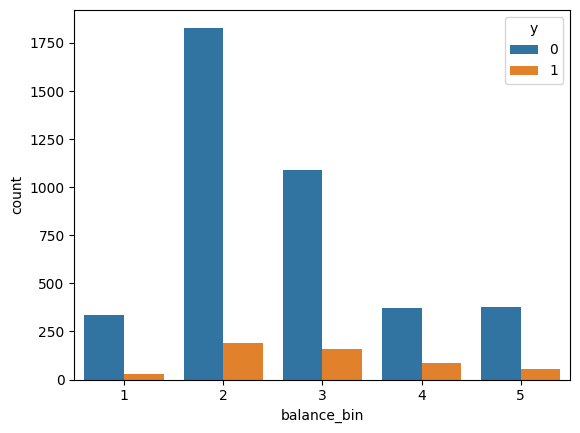

In [ ]:
sns.countplot(data=df_test, x='balance_bin', hue='y')

In [ ]:
def age_bin(x):
    if x >= 18 and x <25:
        return 1
    elif x >= 25 and x <35:
        return 2
    elif x >= 35 and x < 45:
        return 3
    elif x >= 45 and x < 65:
        return 4
    elif x >=65:
        return 5

In [ ]:
df_train['age_bin'] = df_train['age'].apply(age_bin)
df_test['age_bin'] = df_test['age'].apply(age_bin)

In [ ]:
subscribe_rate(df_train, 'age_bin')
subscribe_rate(df_test, 'age_bin')

age_bin
1    25.587145
2    12.482399
3     9.660772
4    10.529150
5    42.098765
Name: percentage, dtype: float64
age_bin
1    19.402985
2    11.743772
3     9.409341
4    11.569149
5    35.955056
Name: percentage, dtype: float64


<Axes: xlabel='age_bin', ylabel='count'>

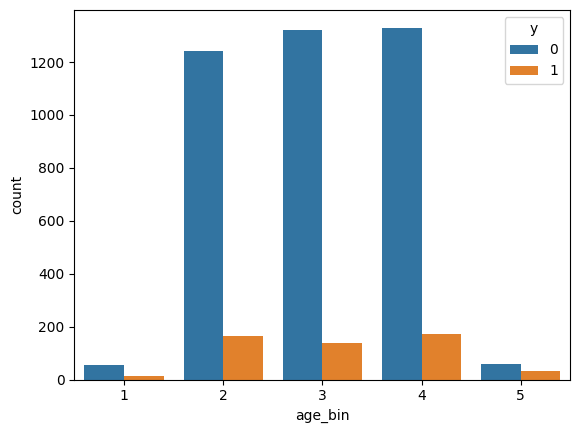

In [ ]:
sns.countplot(data=df_test, x='age_bin', hue='y')

In [ ]:
def duration_bin(x):
    if x <100:
        return 1
    elif x >= 100 and x <300:
        return 2
    elif x >= 300 and x < 750:
        return 3
    elif x >= 750:
        return 4

In [ ]:
df_train['duration_bin'] = df_train['duration'].apply(duration_bin)
df_test['duration_bin'] = df_test['duration'].apply(duration_bin)

In [ ]:
subscribe_rate(df_train, 'duration_bin')
subscribe_rate(df_test, 'duration_bin')

duration_bin
1     1.053711
2     7.712790
3    22.171406
4    54.493392
Name: percentage, dtype: float64
duration_bin
1     1.323251
2     6.827492
3    21.972656
4    54.545455
Name: percentage, dtype: float64


<Axes: xlabel='duration_bin', ylabel='count'>

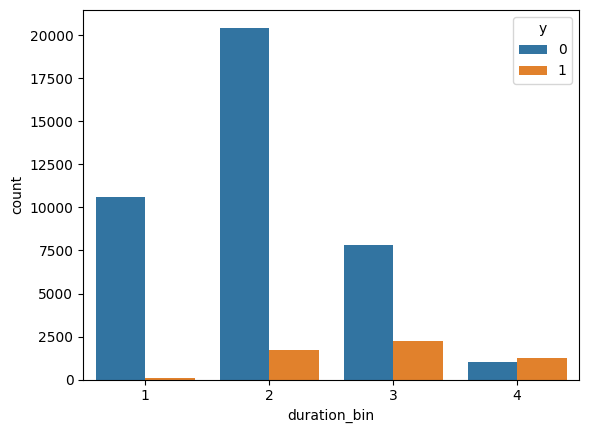

In [ ]:
sns.countplot(data=df_train, x='duration_bin', hue='y')

In [ ]:
def campaign_bin(x):
    if x == 1:
        return 1
    elif x >= 2 and x <5:
        return 2
    elif x >= 5 and x < 10:
        return 3
    elif x >= 10 and x < 15:
        return 4
    elif x >= 15:
        return 5

In [ ]:
df_train['campaign_bin'] = df_train['campaign'].apply(campaign_bin)
df_test['campaign_bin'] = df_test['campaign'].apply(campaign_bin)

In [ ]:
subscribe_rate(df_train, 'campaign_bin')
subscribe_rate(df_test, 'campaign_bin')

campaign_bin
1    14.597583
2    10.841416
3     7.107580
4     5.188679
5     2.768730
Name: percentage, dtype: float64
campaign_bin
1    13.840830
2    11.085235
3     7.660455
4     4.123711
5     3.333333
Name: percentage, dtype: float64


<Axes: xlabel='campaign_bin', ylabel='count'>

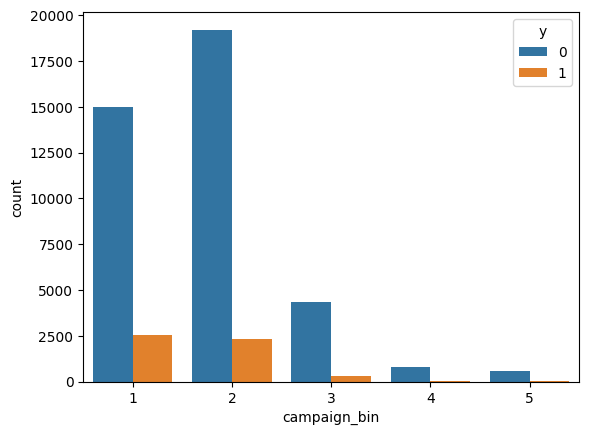

In [ ]:
sns.countplot(data=df_train, x='campaign_bin', hue='y')

In [ ]:
def previous_bin(x):
    if x == 0:
        return 1
    
    elif x == 1:
        return 2
    
    elif x > 1 and x < 20:
        return 3
    
    elif x >= 20 and x <30:
        return 4
    
    elif x >= 30 and x <50:
        return 5
    
    elif x >= 50:
        return 6

In [ ]:
df_train['previous_bin'] = df_train['previous'].apply(previous_bin)
df_test['previous_bin'] = df_test['previous'].apply(previous_bin)

In [ ]:
subscribe_rate(df_train, 'previous_bin')
subscribe_rate(df_test, 'previous_bin')

previous_bin
1     9.157331
2    21.031746
3    24.216156
4    12.500000
5     9.090909
6    66.666667
Name: percentage, dtype: float64
previous_bin
1     9.095816
2    17.832168
3    25.333333
4          NaN
Name: percentage, dtype: float64


<Axes: xlabel='previous_bin', ylabel='count'>

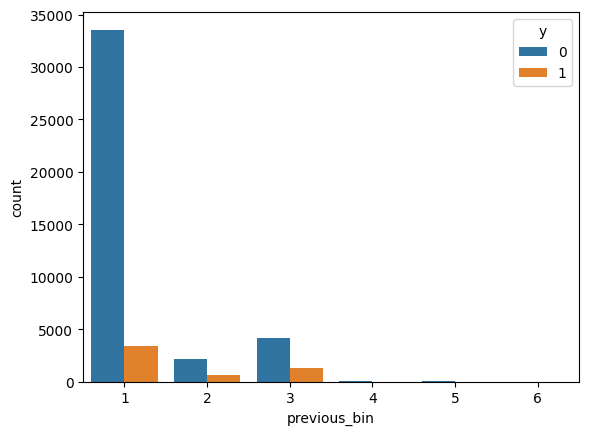

In [ ]:
sns.countplot(data=df_train, x='previous_bin', hue='y')

In [ ]:
def pdays_bin(x):
    if x == -1:
        return 1
    elif x >= 0 and x < 100:
        return 2
    elif x >= 100 and x < 200:
        return 3
    elif x >= 200 and x <400:
        return 4
    elif x >= 400:
        return 4

In [ ]:
df_train['pdays_bin'] = df_train['pdays'].apply(pdays_bin)
df_test['pdays_bin'] = df_test['pdays'].apply(pdays_bin)

In [ ]:
subscribe_rate(df_train, 'pdays_bin')
subscribe_rate(df_test, 'pdays_bin')

pdays_bin
1     9.157331
2    43.496802
3    26.050712
4    13.677582
Name: percentage, dtype: float64
pdays_bin
1     9.095816
2    45.522388
3    23.333333
4    13.874346
Name: percentage, dtype: float64


<Axes: xlabel='pdays_bin', ylabel='count'>

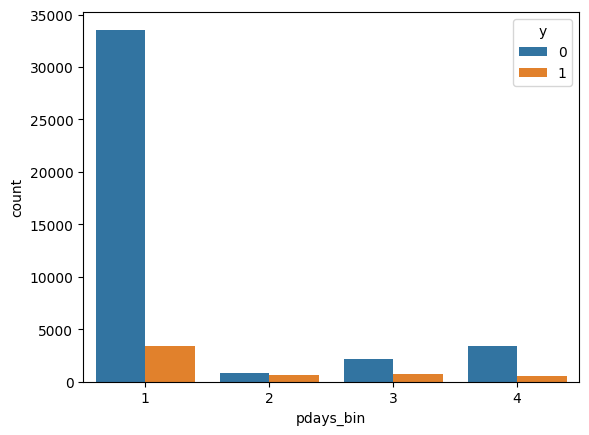

In [ ]:
sns.countplot(data=df_train, x='pdays_bin', hue='y')

In [ ]:
subscribe_rate(df_train, 'campaign_bin')
subscribe_rate(df_test, 'campaign_bin')

campaign_bin
1    14.597583
2    10.841416
3     7.107580
4     5.188679
5     2.768730
Name: percentage, dtype: float64
campaign_bin
1    13.840830
2    11.085235
3     7.660455
4     4.123711
5     3.333333
Name: percentage, dtype: float64


In [ ]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing_loan', 'personal_loan', 'any_loans', 'both_loans', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'contacted',
       'previous', 'poutcome', 'y', 'balance_bin', 'age_bin', 'duration_bin',
       'campaign_bin', 'previous_bin', 'pdays_bin'],
      dtype='object')

Now that we've got some good business insights into who seems to convert at the higher rates with the bins made, let's look at other categories.

In [ ]:
subscribe_rate(df_train, 'job')
subscribe_rate(df_test, 'job')
print('---------------------------')
subscribe_rate(df_train, 'marital')
subscribe_rate(df_test, 'marital')
print('---------------------------')
subscribe_rate(df_train, 'education')
subscribe_rate(df_test, 'education')
print('---------------------------')
subscribe_rate(df_train, 'default')
subscribe_rate(df_test, 'default')
print('---------------------------')
subscribe_rate(df_train, 'contact')
subscribe_rate(df_test, 'contact')
print('---------------------------')

job
admin.           12.202669
blue-collar       7.405190
entrepreneur      8.271688
housemaid         8.790323
management       13.757005
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
Name: percentage, dtype: float64
job
admin.           12.133891
blue-collar       7.293869
entrepreneur      8.928571
housemaid        12.500000
management       13.704071
retired          23.478261
self-employed    10.928962
services          9.112710
student          22.619048
technician       10.807292
unemployed       10.156250
Name: percentage, dtype: float64
---------------------------
marital
divorced    11.945458
married     10.123838
single      14.949179
Name: percentage, dtype: float64
marital
divorced    14.583333
married      9.903468
single      13.963211
Name: percentage, dtype: float64
---------------------------
education
primary       8.626478
secondary    10.782553
tertia

Now that we have insights, let's start building the models. Let's start with the baseline models.

In [ ]:
df_test.dtypes

age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing_loan     object
personal_loan    object
any_loans         int64
both_loans        int64
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
contacted         int64
previous          int64
poutcome         object
y                 int64
balance_bin       int64
age_bin           int64
duration_bin      int64
campaign_bin      int64
previous_bin      int64
pdays_bin         int64
dtype: object

In [ ]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [ ]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'contact', 'day', 'month', 'campaign','poutcome', 'any_loans', 'both_loans']
num_columns = ['balance', 'pdays', 'previous', 'duration']
target = 'y'

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)])

In [ ]:
X_train = df_train[cat_columns + num_columns]
X_test = df_test[cat_columns + num_columns]
y_train = df_train[target]
y_test = df_test[target]

In [ ]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

Logistic Regression

In [ ]:
log = LogisticRegression()
log.fit(X_train_preprocessed, y_train)
y_pred_log = log.predict(X_test_preprocessed)
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4000
           1       0.63      0.32      0.43       521

    accuracy                           0.90      4521
   macro avg       0.78      0.65      0.69      4521
weighted avg       0.88      0.90      0.89      4521



In [ ]:
log_param = {'C': [0.01, 0.1, 10]}

grid_search_log = GridSearchCV(log, log_param, scoring='recall', cv=5)

grid_search_log.fit(X_train_preprocessed, y_train)
best_log_reg = grid_search_log.best_estimator_
best_log_reg.fit(X_train_preprocessed, y_train)
y_pred_log = best_log_reg.predict(X_test_preprocessed)


print("Best parameters found: ", grid_search_log.best_params_)
cv_scores = cross_val_score(best_log_reg, X_train_preprocessed, y_train, cv=5, scoring='recall')
mean_cv_score = np.mean(cv_scores)
print(f"Average CV Recall Score: {mean_cv_score * 100:.2f}%")
print(classification_report(y_test, y_pred_log))

Best parameters found:  {'C': 10}
Average CV Recall Score: 29.17%
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4000
           1       0.63      0.32      0.43       521

    accuracy                           0.90      4521
   macro avg       0.78      0.65      0.69      4521
weighted avg       0.88      0.90      0.89      4521



KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_preprocessed, y_train)
y_pred_knn = knn.predict(X_test_preprocessed)

cv_scores = cross_val_score(knn, X_train_preprocessed, y_train, cv=5, scoring='recall')
mean_cv_score = np.mean(cv_scores)
print(f"Average CV Recall Score: {mean_cv_score * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Average CV Recall Score: 23.75%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4000
           1       0.75      0.45      0.56       521

    accuracy                           0.92      4521
   macro avg       0.84      0.72      0.76      4521
weighted avg       0.91      0.92      0.91      4521



In [ ]:
params_knn = {'n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, params_knn, cv=5, scoring='recall')
grid_search_knn.fit(X_train_preprocessed, y_train)
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_preprocessed)


print("Best parameters found: ", grid_search_knn.best_params_)
#cv_scores = cross_val_score(best_knn, X_train_preprocessed, y_train, cv=5, scoring='recall')
#mean_cv_score = np.mean(cv_scores)
#print(f"Average CV Recall Score: {mean_cv_score * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Best parameters found:  {'n_neighbors': 3}
Average CV Recall Score: 25.35%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4000
           1       0.78      0.55      0.65       521

    accuracy                           0.93      4521
   macro avg       0.86      0.77      0.80      4521
weighted avg       0.93      0.93      0.93      4521



Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_preprocessed, y_train)
y_pred_rf = rf.predict(X_test_preprocessed)


#cv_scores = cross_val_score(rf, X_train_preprocessed, y_train, cv=5, scoring='recall')
#mean_cv_score = np.mean(cv_scores)
#print(f"Average CV Recall Score: {mean_cv_score * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      0.99      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



In [ ]:
rf_param = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30, 50]}

grid_search_rf = GridSearchCV(rf, rf_param, cv=5, scoring= 'recall')

grid_search_rf.fit(X_train_preprocessed, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_preprocessed)


print("Best parameters found: ", grid_search_rf.best_params_)
#cv_scores = cross_val_score(best_rf, X_train_preprocessed, y_train, cv=5, scoring='recall')
#mean_cv_score = np.mean(cv_scores)
#print(f"Average CV Recall Score: {mean_cv_score * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Best parameters found:  {'max_depth': 50, 'n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      0.99      0.99       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521

